The Fourier transform is a way of expressing imformation in the **frequency domain** instead of the time domain. You can go back and forth from one to the other.

It would be easiest to examine how the Fourier transform behaves in 1D before moving to 2D images. The expression for the 1D Fourier transform is:

$$ F(u) = \int_{\infty}^{\infty}{f(x)e^{-j2\pi u x}dx} $$

And the inverse transform (going back into the spatial domain):

$$f(x) = \int_{\infty}^{\infty}{F(u)e^{j2 \pi u x}dx} $$

But since we will be dealing with discrete-valued functions (images) we need to have a discrete form of the Fourier transform. This can be expressed as:

$$F(u) = \frac{1}{M} \sum_{x=0}^{M-1}{f(x) e^{-j2 \pi ux/M}} $$

This is easiest to make sense of when you see a few example to get the idea of how the transform behaves.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [37]:
x = np.linspace(0, 20, 1001)
y = np.sin(x)
yf = sp.fft(y)

y1 = 0.5*y
y1f = sp.fft(y1)

y2 = np.sin(20*x)
y2f = sp.fft(y2)

y3 = 0.5*(y+y2)
y3f = sp.fft(y3)

<BarContainer object of 1001 artists>

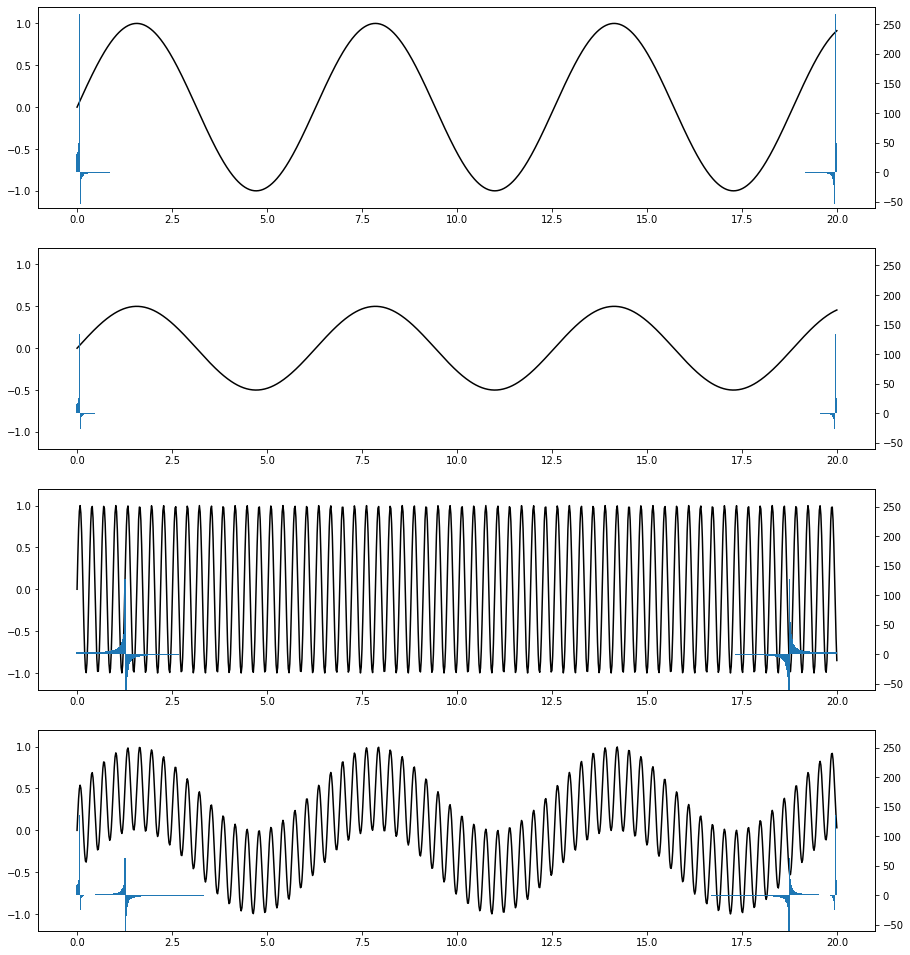

In [38]:
fig, axes = plt.subplots(nrows=4, figsize=(15,17))

taxes = [0]*4
for i, ax in enumerate(axes):
    taxes[i] = ax.twinx()
    ax.set_ylim([-1.2, 1.2])
    taxes[i].set_ylim([-60, 280])

axes[0].plot(x, y, c='k')
taxes[0].bar(x, yf, width=0.03)

axes[1].plot(x, y1, c='k')
taxes[1].bar(x, y1f, width=0.03)

axes[2].plot(x, y2, c='k')
taxes[2].bar(x, y2f, width=0.03)

axes[3].plot(x, y3, c='k')
taxes[3].bar(x, y3f, width=0.03)
#ax.bar(x, yf, width=0.05)


The 2D version of the discrete Fourier transform has a similar expression:

$$F(u,v) = \frac{1}{MN}\sum_{x=0}^{M-1}{\sum_{y=0}^{N-1}{f(x,y) e^{-j2 \pi (ux/M + vy/N)}}} $$

In [87]:
from skimage.morphology import disk
from skimage.util import pad, img_as_float
from skimage.exposure import equalize_hist
from mpl_toolkits.mplot3d import Axes3D

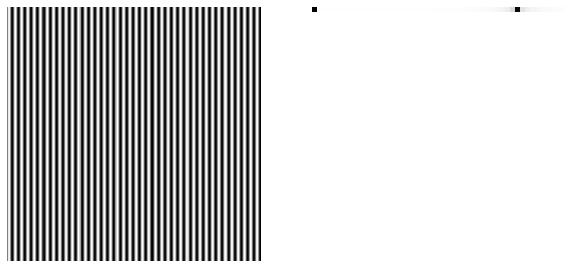

In [178]:
# m1 = np.zeros((1000, 100))
# m1[:, 0:50] = 1
# im = np.concatenate((m1, m1, m1, m1, m1, m1, m1, m1, m1, m1), axis=1)
# fim = np.real(np.fft.fft2(im))

x, y = np.meshgrid(np.linspace(0, 500, 501), np.linspace(0, 500, 501))
im = 0.5+np.sin(0.5*x)
fim = np.abs(np.fft.fft2(im))
fim = 1-(fim - np.min(fim))/np.ptp(fim)


fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

for axi in ax:
    axi.axis('off')
    
ax[0].imshow(im, cmap='gray')
ax[1].imshow(fim[0:50, 0:50], cmap='gray')

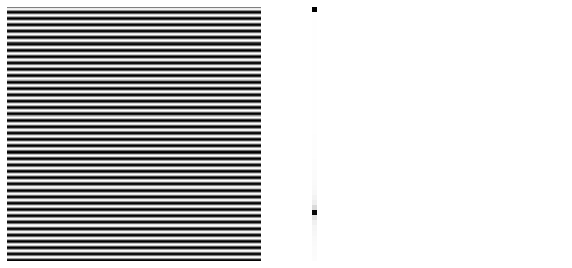

In [179]:
x, y = np.meshgrid(np.linspace(0, 500, 501), np.linspace(0, 500, 501))
im = 0.5+np.sin(0.5*y)
fim = np.abs(np.fft.fft2(im))
fim = 1-(fim - np.min(fim))/np.ptp(fim)


fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

for axi in ax:
    axi.axis('off')
    
ax[0].imshow(im, cmap='gray')
ax[1].imshow(fim[0:50, 0:50], cmap='gray')

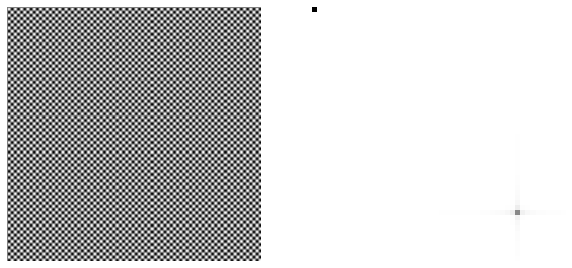

In [180]:
x, y = np.meshgrid(np.linspace(0, 500, 501), np.linspace(0, 500, 501))
im = 0.5+np.sin(0.5*x)*np.sin(0.5*y)
fim = np.abs(np.fft.fft2(im))
fim = 1-(fim - np.min(fim))/np.ptp(fim)


fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

for axi in ax:
    axi.axis('off')
    
ax[0].imshow(im, cmap='gray')
ax[1].imshow(fim[0:50, 0:50], cmap='gray')

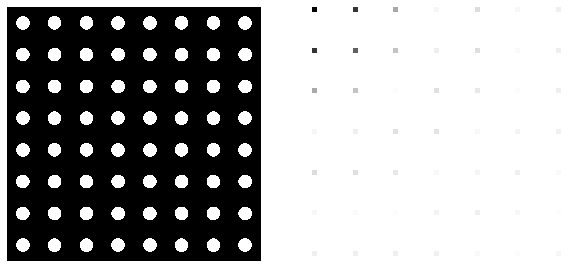

In [181]:
m1 = pad(disk(30), 40)

im = np.concatenate((m1, m1, m1, m1, m1, m1, m1, m1), axis=0)
im = np.concatenate((im, im, im, im, im, im, im, im), axis=1)

fim = np.abs(np.fft.fft2(im))
fim = 1-(fim - np.min(fim))/np.ptp(fim)


fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

for axi in ax:
    axi.axis('off')
    
ax[0].imshow(im, cmap='gray')
ax[1].imshow(fim[0:50, 0:50], cmap='gray')

How about an actual picture now? Let's try our trusty camera-man.

In [141]:
from skimage import data
from skimage import exposure

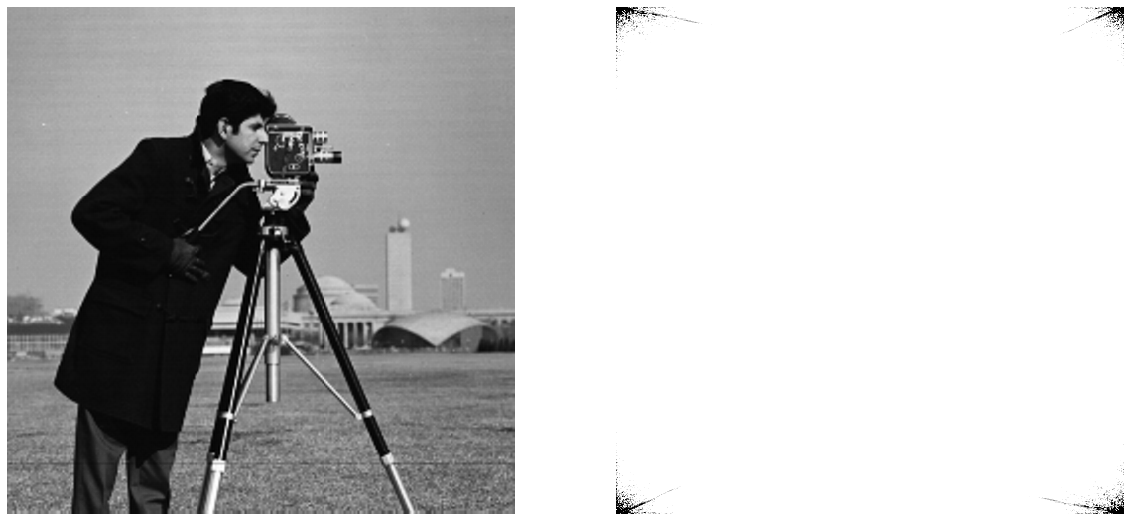

In [202]:
im = img_as_float(data.camera())

fim = np.abs(np.fft.fft2(im, norm='ortho'))
fim = equalize_hist(1-(fim - np.min(fim))/np.ptp(fim))


fig, ax = plt.subplots(ncols=2, figsize=(20, 10))

for axi in ax:
    axi.axis('off')
    
ax[0].imshow(im, cmap='gray')
ax[1].imshow(fim, cmap='gray')

Note that it is standard to center the spectrum. We will also perform a log adjustment to enhance the contrast.

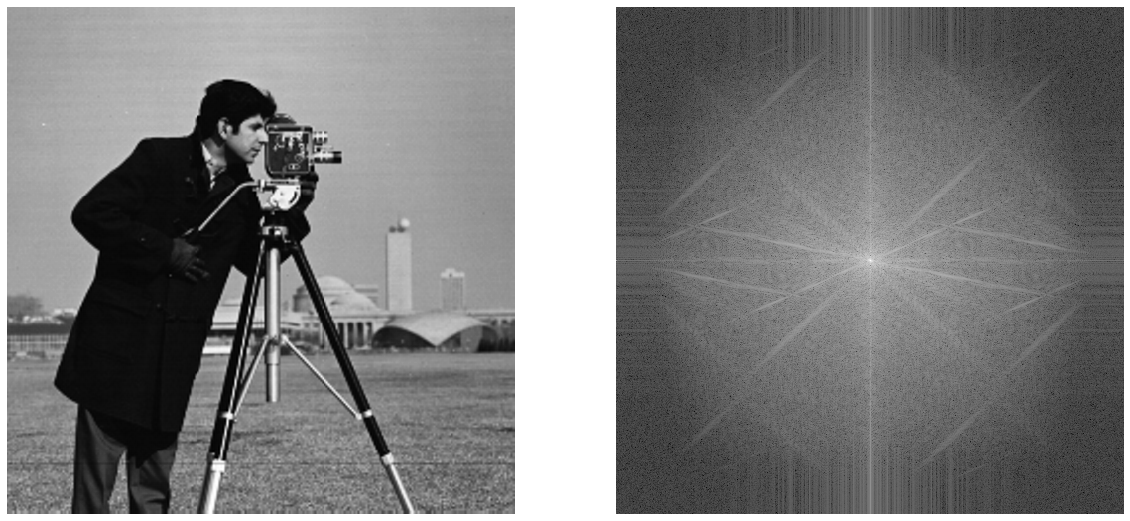

In [209]:
fim = np.abs(np.fft.fft2(im, norm='ortho'))
fim = np.log(fim)
fim = (fim - np.min(fim))/np.ptp(fim)
fim2 = np.fft.fftshift(fim)

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))

for axi in ax:
    axi.axis('off')
    
ax[0].imshow(im, cmap='gray')
ax[1].imshow(fim2, cmap='gray')

With the exception of trivial cases, it is usually impossible to make direct associations between specific components of an image and its transform. There are some general statements that we can make though:

Since frequency is directly related to the rate of change, we can intuit that frequencies in the Fourier space correspond to patterns in the spatial domain. As we move away from the center, the low frequencies correspond to the slowly varying components of an image. Higher frequencies farther out from the center correspond to faster and faster gray level changes in the image.

# Filtering in the frequency domain

Filtering in the frequency domain consists of the following steps:

1. Compute F(u,v) the DFT of the image.
2. Center transform
3. Multiply F(u,v) by a filter function H(u,v)
4. Un-center the transform
5. Computer the inverse
6. Obtain the real part

It just so happens that F(0,0) = the average intensity of the original image. So, if we set this single value to zero, the average intensity of the image will be 0. This is known as a **notch filter**. That doesn't matter if we're scaling everything between 0 and 1, so we won't bother.

Low frequencies are responsible for the general gray-level appearance of an image over smooth areas, while high frequencies are responsible for detail, such as edges and noise. A filter that attenuates high frequencies while "passing" low frequencies is called a **lowpass filter**. A filter that has the opposite effect is called a **highpass filter**. A low-pass filtered image would have less sharp detail, because high frequencies have been attenuated. A high-pass filtered image would have less gray-level variations in smooth areas and emphasized transitional (edge) gray-level details (e.g. a sharper image).

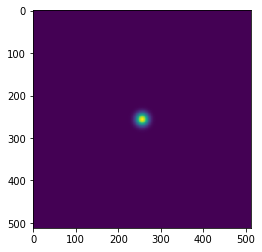

In [330]:
x, y, = np.meshgrid(np.linspace(0, 511, 512), np.linspace(0, 511, 512))
mu, sigma = 256, 10

gfilt = np.exp(-((x-mu)**2+(y-mu)**2)/(2*sigma**2)) # Try playing around with highpass and lowpass filters

plt.imshow(gfilt)

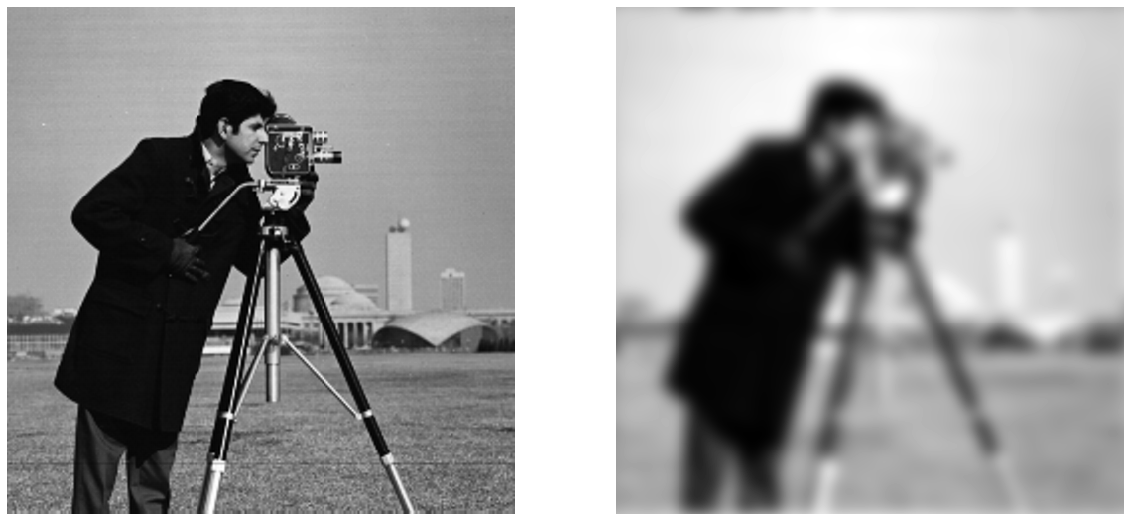

In [331]:
fim = np.fft.fft2(im) # Perform transform
fim2 = np.fft.fftshift(fim) # Center
fim3 = np.multiply(fim2, gfilt) # Multiply by filter function
fim4 = np.fft.ifftshift(fim3) # Un-center
im2 = np.real(np.fft.ifft2(fim4)) # Perform inverse transform

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))

for axi in ax:
    axi.axis('off')
    
ax[0].imshow(im, cmap='gray')
ax[1].imshow(im2, cmap='gray')

This should look a little familiar: didn't we get similar results from using convolutions in the spatial domain? Actually yes. We are just doing the same thing two different ways. A convolution in the spatial domain is the same as multiplication in the Fourier domain:

$$f(x,y) * h(x,y) \leftrightarrow F(u,v)H(u,v) $$

Analogously:

$$f(x,y)h(x,y) \leftrightarrow F(u,v) * H(u,v) $$

Why is this important? In general, if the filters are the same size, it is computationally more efficient to work in the frequency domain. But we often use smaller filters in the spatial domain-- in that case, it is more efficient to work in the spatial domain. You can also derive smaller spatial domain filters if you know the filter in the frequency domain. What is typically done in practice is to experiment in the frequency domain, obtain an H(u,v), then develop a smaller filter in the spatial domain based on H(u,v) that is used in practice.

You can also try **ideal** filters, that are just binary filters, as opposed to gradually changing filters like the Gaussian

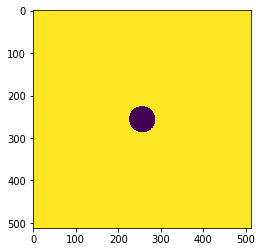

In [266]:
ifilt = 1- pad(disk(31), 225)[0:512, 0:512]
plt.imshow(ifilt)

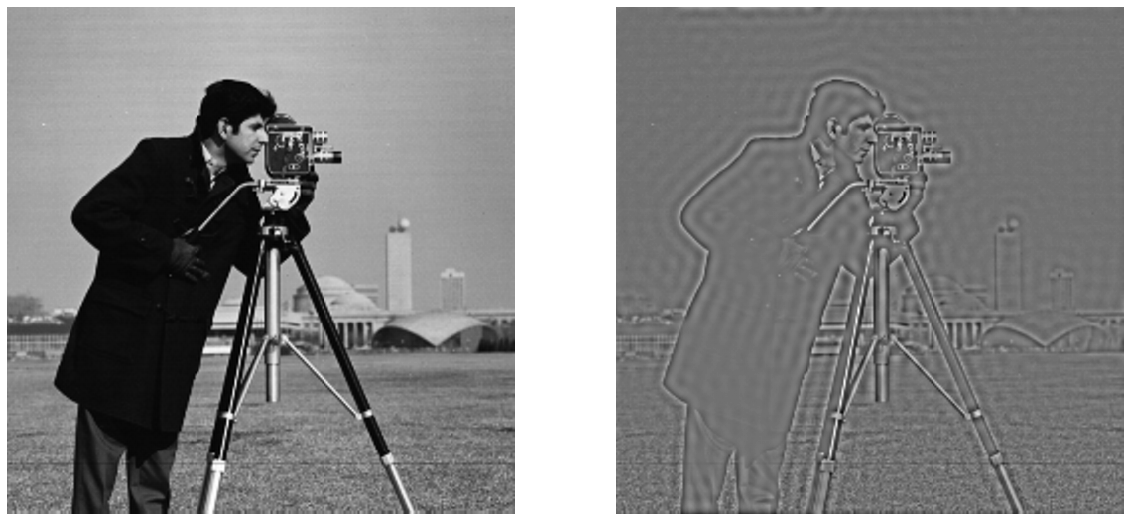

In [267]:
fim = np.fft.fft2(im) # Perform transform
fim2 = np.fft.fftshift(fim) # Center
fim3 = np.multiply(fim2, ifilt) # Multiply by filter function
fim4 = np.fft.ifftshift(fim3) # Un-center
im2 = np.real(np.fft.ifft2(fim4)) # Perform inverse transform

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))

for axi in ax:
    axi.axis('off')
    
ax[0].imshow(im, cmap='gray')
ax[1].imshow(im2, cmap='gray')

Note the odd ringing that occurs when using ideal filters. This is a characteristic of ideal filters. This can be explained if you look at the corresponding filter in the spatial domain.

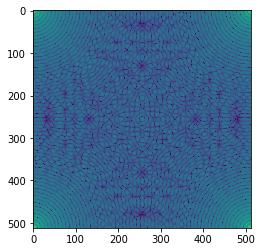

In [290]:
ifilt2 = np.fft.ifftshift(ifilt) # Un-center
iifilt = np.abs(np.fft.ifft2(ifilt2)) # Perform inverse transform
iifilt2 = np.log(iifilt)
iifilt2 = (iifilt2 - np.min(iifilt2))/np.ptp(iifilt2)
plt.imshow(iifilt2, vmin=0.3)

Or, going to the center to construct a smaller filter

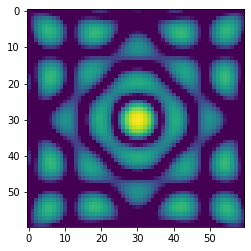

In [293]:
plt.imshow(iifilt2[256-30:256+30, 256-30:256+30], vmin=0.5)

The centeral circle is responsible for the blurring in the processing image, while the concentric rings are responsible for the ringing behavior. Gaussian filters achieve blurring without ringing, because they have the central circle without the concentric rings.

An intermediate filter is the **Butterworth filter**. It has the form:

$$H(u,v) = \frac{1}{1+[D(u,v)/D_0]^{2n}}$$

where D is the distance from any point to the center:

$$D(u,v) = [(u-M/2)^2+(v-N/2)^2]^{1/2} $$

Where n is the order of the filter and $D_0$ is the cutoff frequency.

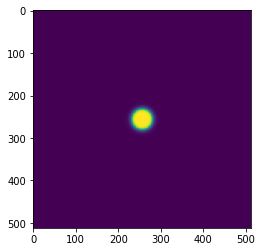

In [336]:
n, D0 = 10, 5

u, v = np.meshgrid(np.linspace(0,511,512), np.linspace(0,511,512))
D = np.sqrt((u-512/2)**2+(v-512/2)**2)**0.5
Bfilt = 1/(1+(D/D0)**(2*n))

plt.imshow(Bfilt)

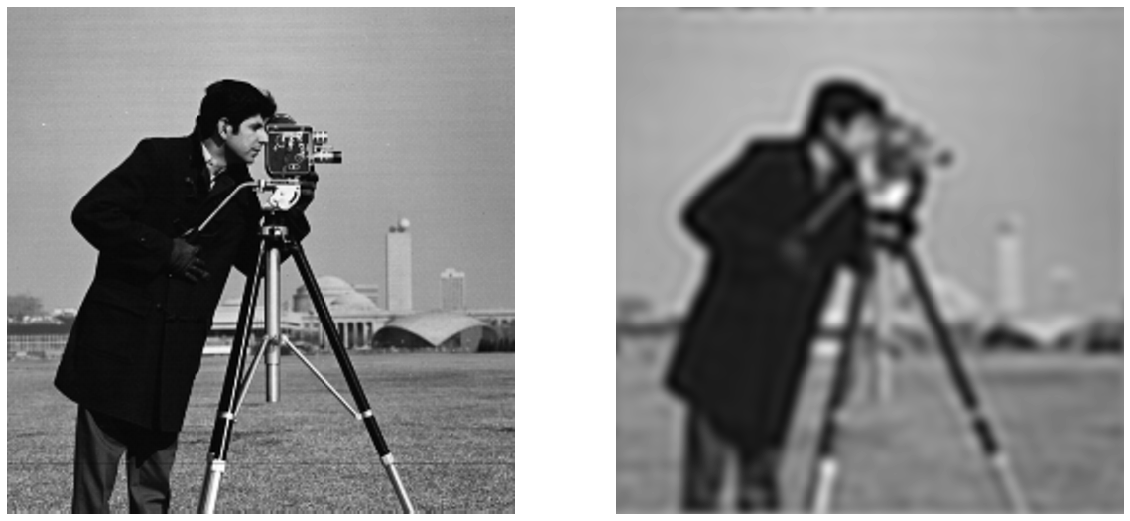

In [337]:
fim = np.fft.fft2(im) # Perform transform
fim2 = np.fft.fftshift(fim) # Center
fim3 = np.multiply(fim2, Bfilt) # Multiply by filter function
fim4 = np.fft.ifftshift(fim3) # Un-center
im2 = np.real(np.fft.ifft2(fim4)) # Perform inverse transform

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))

for axi in ax:
    axi.axis('off')
    
ax[0].imshow(im, cmap='gray')
ax[1].imshow(im2, cmap='gray')

A Butterworth filter of order 1 has no ringing. Ringing is imperceptible with filters of order 2, but becomes more significant with higher order filters. It's an intermediate between ideal filters and Gaussian filters.

# Applied Filtering

